In [1]:
# -*- coding: utf-8 -*-
#import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
#import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
#import contextily as ctx
from pylab import figure, scatter, show
import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
from math import cos
import seaborn as sns
import cartopy.crs as ccrs

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def find_name(point):
    for name, polygon in zip(df_map['NAME'], df_map['geometry']):
        if point.within(polygon):
            return name
    return ''

In [3]:
r_labels = ['All retails','General retail','Food, beverages and tobacco products','Textiles, apparel and daily necessities',
           'Cultural, sporting goods and equipment','medicines and medical equipment','automobiles, motorcycles, spare parts and fuel and other power',
           'household appliances and electronic products','hardware, furniture and upholstery materials']
year = 2020 
scattergdf = gpd.read_file(f'../result/data/osm_poi_data_selected/{year}/greater-london-{year}-free-selected.shp')
#scattergdf = scattergdf.to_crs(crs='OSGB36 / British National Grid') #change Latitude and longitude to Cartesian coordinate system
scattergdf

,osm_id,code,fclass,name,class,geometry
0,20849687,2303,cafe,None,2.0,POINT (-0.33392 51.41117)
1,25475389,2303,cafe,Woburn Cafe,2.0,POINT (-0.12925 51.52658)
2,25497832,2303,cafe,Cafe Angel,2.0,POINT (-0.11611 51.52476)
3,25696354,2303,cafe,Crazy Horse Cafe,2.0,POINT (-0.07472 51.55213)
4,25991205,2303,cafe,Jack's Cafe,2.0,POINT (-0.07248 51.55090)
...,...,...,...,...,...,...
13841,6457582585,2504,mall,None,1.0,POINT (-0.06962 51.47342)
13842,6498189131,2504,mall,Hadson Mall,1.0,POINT (-0.17402 51.52295)
13843,3753647145,2306,food_court,Ethos,2.0,POINT (-0.13910 51.51634)
13844,5718576951,2306,food_court,None,2.0,POINT (0.03050 51.53935)


In [4]:
df_map = gpd.read_file('../data/statistical-gis-boundaries-london/ESRI', crs='ESRI:54004')
df_map = df_map.to_crs(epsg=4326)
df_map

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((-0.06402 51.31864, -0.06408 51.31861..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((0.01213 51.29960, 0.01196 51.29980, ..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((-0.24456 51.48870, -0.24468 51.48868..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((-0.41183 51.53408, -0.41188 51.53412..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((0.15869 51.51219, 0.15871 51.51224, ..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((-0.40407 51.61318, -0.40388 51.61229..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((-0.40407 51.61318, -0.40320 51.61318..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((-0.19657 51.52765, -0.19685 51.52773..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((-0.19990 51.67017, -0.19970 51.66986..."


/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/xiuyu/opt/anaconda

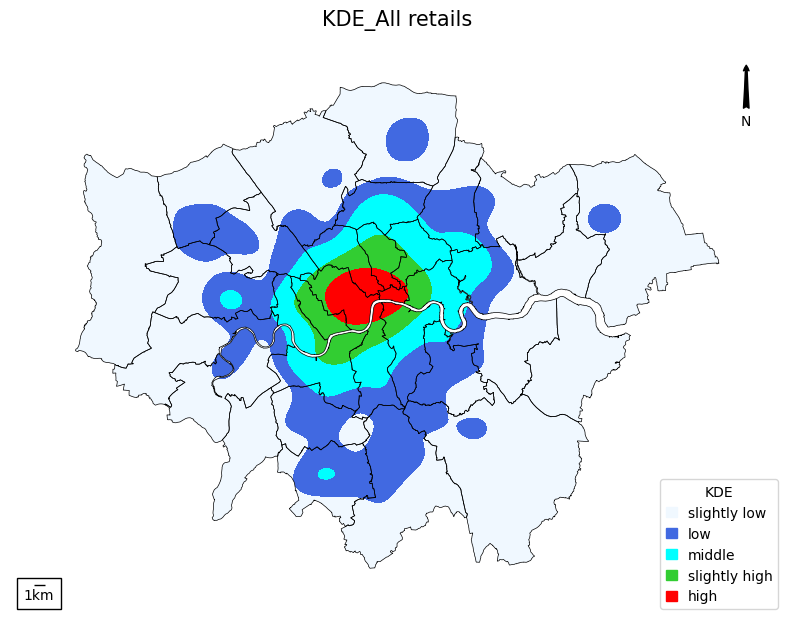

In [5]:
import matplotlib.colors as colors

color = ['xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea','xkcd:washed out green','xkcd:buff']#'xkcd:dusty orange']
labels = ['slightly low','low','middle','slightly high','high']
# draw the london map 
proj = ccrs.AlbersEqualArea()
#fig,ax = plt.subplots(figsize=(10,10))#,subplot_kw=dict(projection=proj))
# draw the boroughs of London
color = ['aliceblue','royalblue','cyan','limegreen','red']
color1 = ['aliceblue','royalblue','royalblue','cyan','limegreen','yellow','limegreen',
         'limegreen','red','xkcd:washed out green','xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','royalblue','cyan','limegreen','yellow','orange',]
cmap = colors.ListedColormap(color1)

ax = gplt.kdeplot(scattergdf,
              cmap = cmap,#"Spectral_r",
              clip = df_map,projection=gcrs.AlbersEqualArea(),
              levels=6,
              thresh=.0,
              shade=True,
              #shade_lowest=True,
              figsize=(10,10),
              legend=True,
              cbar=False,
              )

gplt.polyplot(ax=ax,df=df_map, facecolor='none',edgecolor='k',linewidth=0.5,zorder=12)

#ax.axis('on')
plt.xticks([])
plt.yticks([])

#gplt.polyplot(ax=ax,df=df_map, facecolor='none',edgecolor='k',lw=0.5,zorder=12)
#centroids = df_map.geometry.centroid
##ax.text(centroids.x,centroids.y,s = df_map['NAME'])
#for i,p in enumerate(centroids):
#    ax.text(p.x,p.y,s = df_map.loc[i,'NAME'],fontsize=5,color='k',zorder=13,
#            horizontalalignment='center')
    
#plot North arrow
x,y,arrow_length = 0.95,0.95,0.1
ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
            ha = 'center',va='center',fontsize=10,
            arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
            xycoords=ax.transAxes)

#plot scale bar
size = 1000  # distance
iow_scale_bar = AnchoredSizeBar(ax.transData,
                                size=size,label='1km',loc='lower left',pad=0.5,
                                borderpad=0.5,color='black',
                                frameon=True)#,size_vertical=0.5)
ax.add_artist(iow_scale_bar)

#plot legend

legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
                      label=labels[i]) for i in range(0,5)]

ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='KDE')
ax.set_title(f'KDE_{r_labels[0]}',fontsize=15)

path_out = '../result/plot/'
filename = f'{year}_KDE_all'
plt.savefig(path_out+filename+'.png',
                dpi=500,bbox_inches = 'tight')

/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/xiuyu/opt/anaconda

/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/xiuyu/opt/anaconda3/envs/tianyi/lib/python3.7/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/xiuyu/opt/anaconda

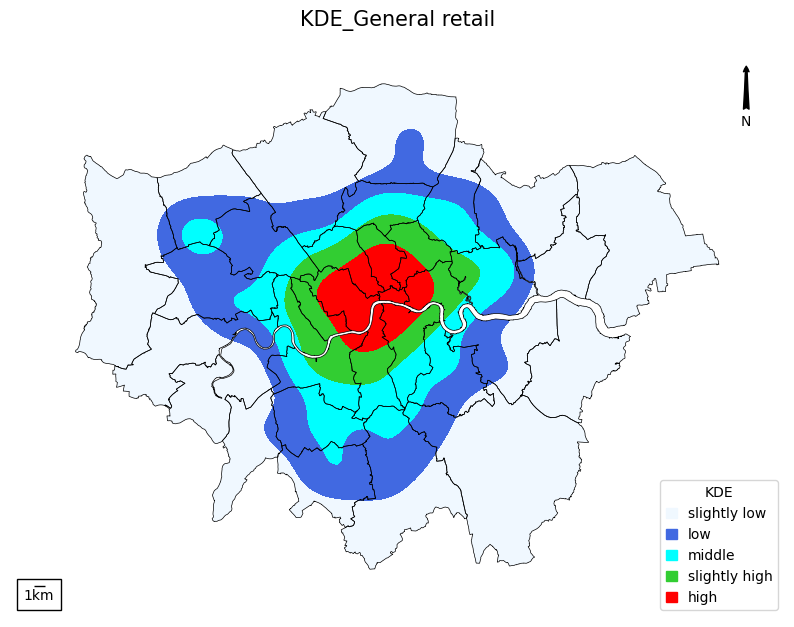

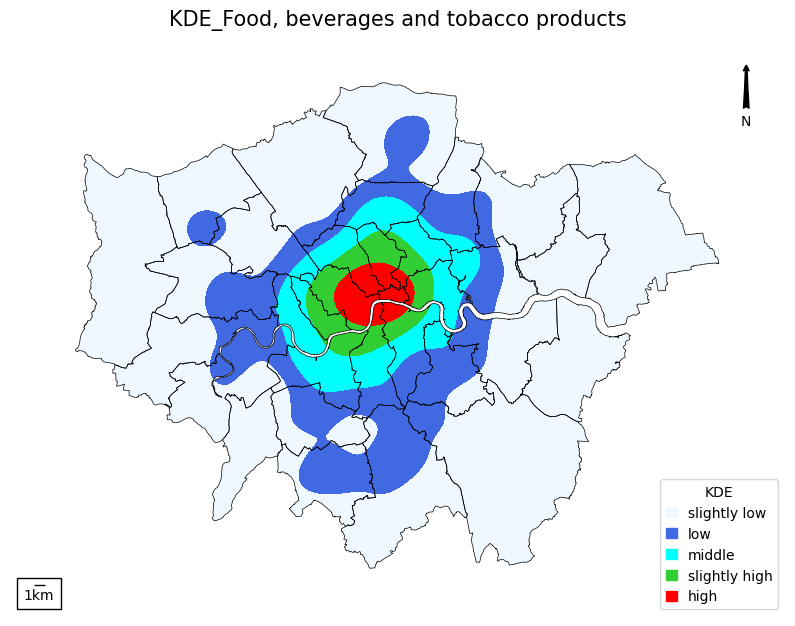

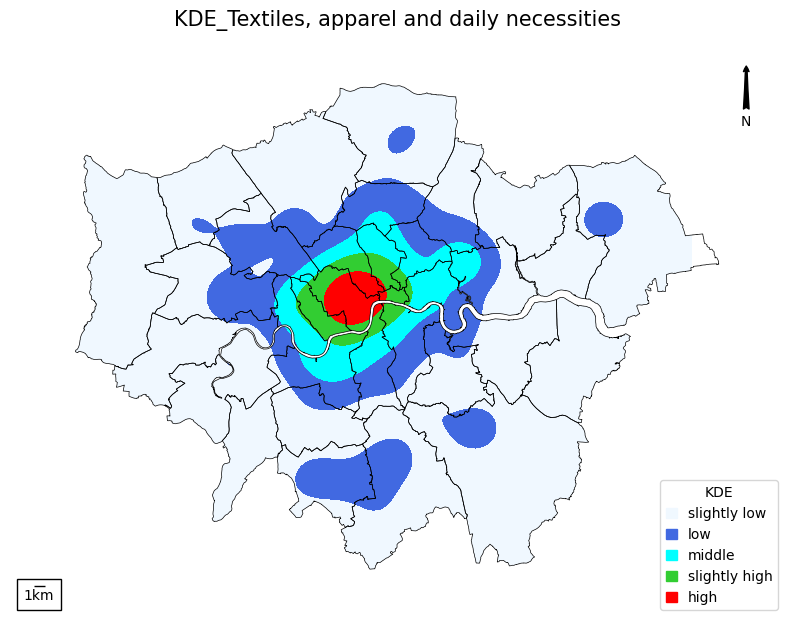

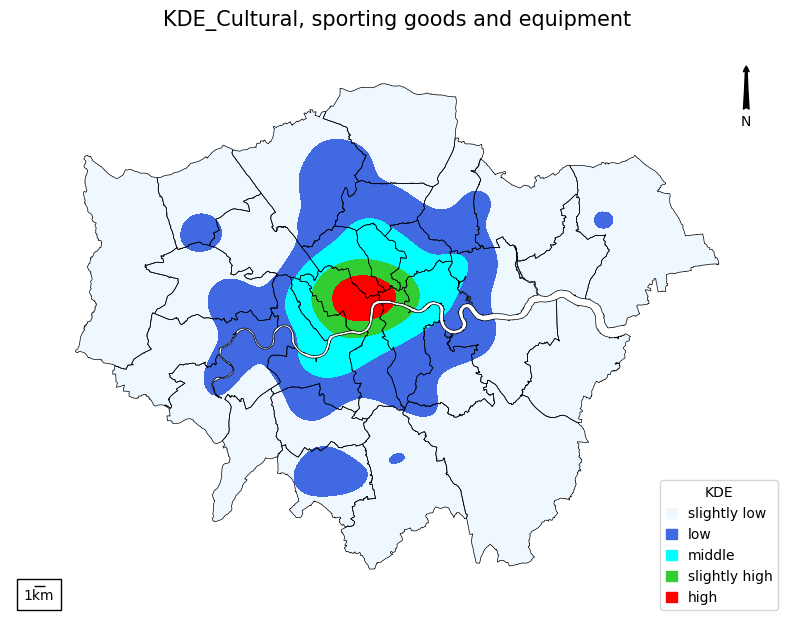

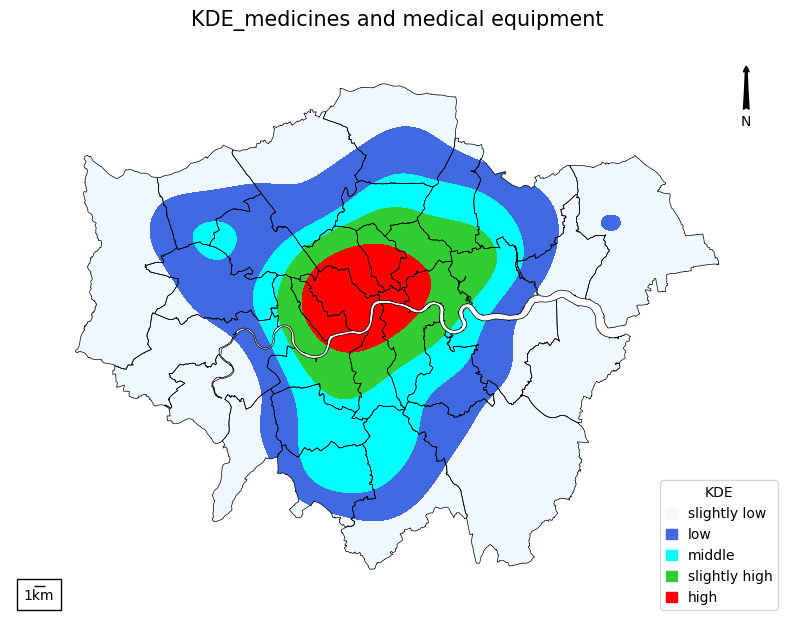

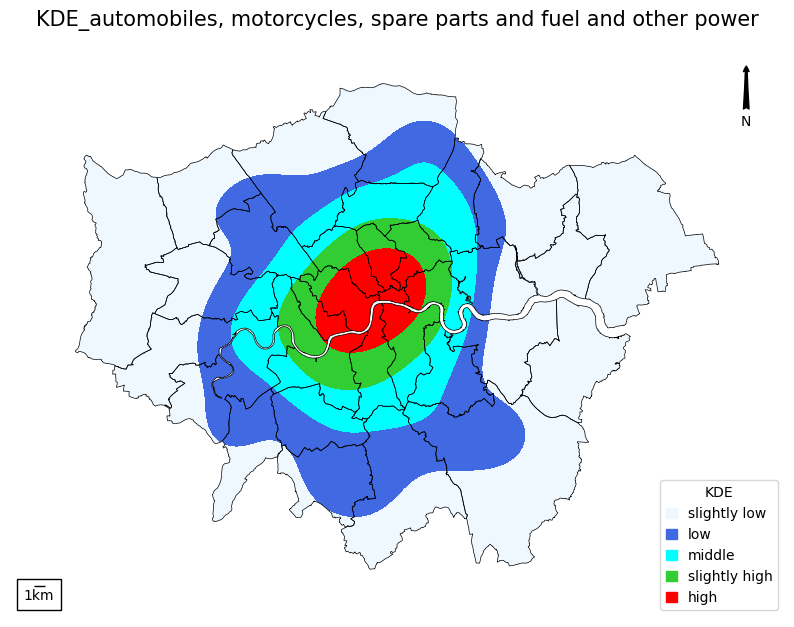

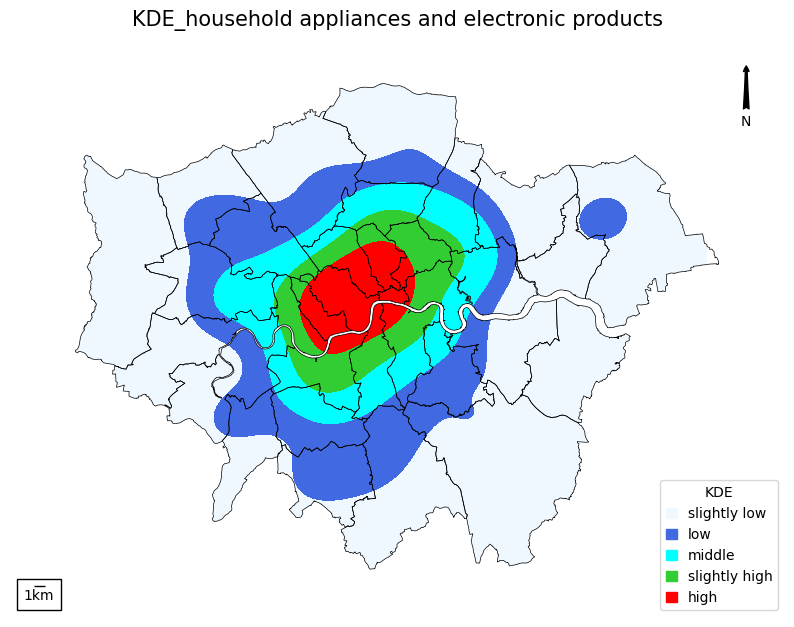

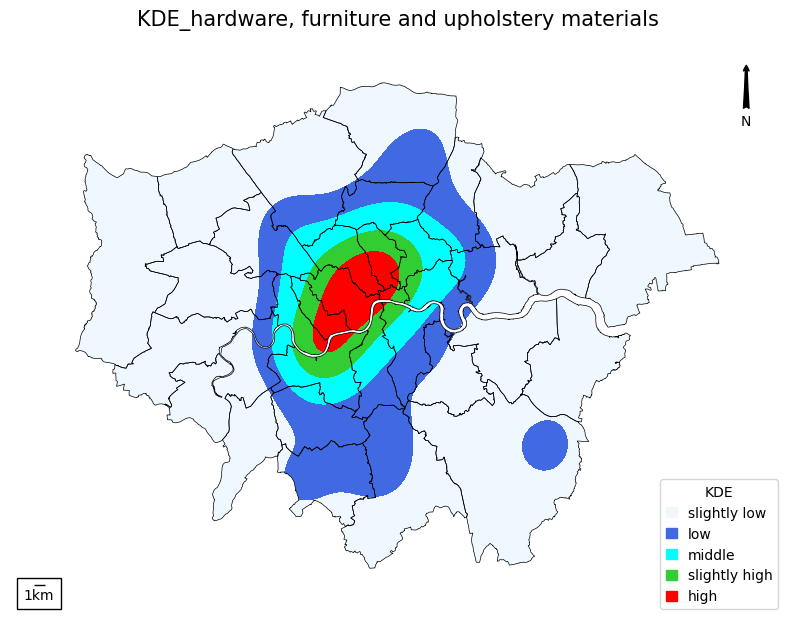

In [6]:
# Drawing the KDE diagram for each Type

color1 = ['aliceblue','aliceblue','royalblue','royalblue','cyan','yellow','cyan',
         'cyan','red','xkcd:washed out green','limegreen','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','royalblue','red','limegreen','yellow','orange']
color2 = ['aliceblue','royalblue','royalblue','cyan','cyan','yellow','limegreen',
         'limegreen','limegreen','xkcd:washed out green','xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea',
        'red','red','red','cyan','limegreen','yellow','orange',]
color3 = ['aliceblue','royalblue','royalblue','cyan','limegreen','yellow','limegreen',
         'limegreen','limegreen','xkcd:washed out green','xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','red','cyan','limegreen','yellow','orange',]
color4 = ['aliceblue','royalblue','royalblue','cyan','limegreen','yellow','limegreen',
         'limegreen','limegreen','xkcd:washed out green','xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','royalblue','red','limegreen','yellow','orange',]
color5 = ['aliceblue','aliceblue','royalblue','royalblue','limegreen','cyan','limegreen',
         'limegreen','red','limegreen','xkcd:dark periwinkle','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','red','cyan','limegreen','yellow','orange',]
color6 = ['aliceblue','aliceblue','royalblue','royalblue','limegreen','cyan','limegreen',
         'limegreen','red','xkcd:washed out green','limegreen','xkcd:nice blue','xkcd:sea',
        'aliceblue','red','royalblue','red','limegreen','yellow','orange',]
color7 = ['aliceblue','aliceblue','royalblue','cyan','royalblue','yellow','cyan',
         'cyan','red','xkcd:washed out green','xkcd:dark periwinkle','limegreen','limegreen',
        'aliceblue','red','royalblue','red','limegreen','yellow','orange',]
color8 = ['aliceblue','royalblue','royalblue','royalblue','cyan','yellow','cyan',
         'cyan','red','limegreen','xkcd:dark periwinkle','limegreen','limegreen',
        'aliceblue','red','royalblue','cyan','red','yellow','orange',]
cols   = [color1,color2,color3,color4,color5,color6,color7,color8]

nT = int(scattergdf['class'].max())
for i in range(1,nT+1):
    ii = (i-1)%3
    jj = (i-1)//3
    data = scattergdf[scattergdf['class']==i]
    # draw the boroughs of London
    cmap = colors.ListedColormap(cols[i-1])
    ax = gplt.kdeplot(data,
              cmap = cmap,#"Spectral_r",
              clip = df_map,projection=gcrs.AlbersEqualArea(),
              levels=6,
              thresh=.0,
              shade=True,
              #shade_lowest=True,
              figsize=(10,10),
              legend=True,
              cbar=False,
              )


    
    gplt.polyplot(ax=ax,df=df_map, facecolor='none',edgecolor='k',linewidth=0.5,zorder=12)
    
    #plot North arrow
    x,y,arrow_length = 0.95,0.95,0.1
    ax.annotate('N',xy=(x,y),xytext=(x,y-arrow_length),
                ha = 'center',va='center',fontsize=10,
                arrowprops=dict(arrowstyle='Fancy',facecolor='black'),
                xycoords=ax.transAxes)

    #plot scale bar
    size = 1000  # distance
    iow_scale_bar = AnchoredSizeBar(ax.transData,
                                    size=size,label='1km',loc='lower left',pad=0.5,
                                    borderpad=0.5,color='black',
                                    frameon=True)#,size_vertical=0.5)
    ax.add_artist(iow_scale_bar)

    #plot legend
    
    legend_elements = [Patch(facecolor=color[i], edgecolor=color[i],
                          label=labels[i]) for i in range(0,5)]

    ax.legend(handles=legend_elements, loc='lower right',handlelength=0.8,fontsize=10,title='KDE')
    ax.set_title(f'KDE_{r_labels[i]}',fontsize=15)
    
    path_out = '../result/plot/'
    filename = f'{year}_KDE_type_{i}'
    plt.savefig(path_out+filename+'.png',
                    dpi=500,bbox_inches = 'tight')